### Linguistic Corpus Analysis

This is part of an assignment on exploratory data analysis. The data set is a linguistic related corpus compiled from Lingbuzz. The source code for the compilation of the corpus can be found on [github](https://github.com/UrielTallon/Text_Mining)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections as coll
import re
import nltk
import json

%matplotlib inline

E:\Anaconda3\envs\CourseraML\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [27]:
mpl.rc('figure', figsize = (18, 10))

In [5]:
with open('Data/lingBuzzCorpus.json', 'rb') as f:
    data = json.load(f)

In [11]:
dataTable = pd.DataFrame.from_dict(data, orient = 'index')
dataTable = dataTable.drop('ref', axis = 1)

In [12]:
dataTable.head(10)

,cnt,kwd,tit,pub,dat,aut,exc
000001,2900,"[preposition, adposition, space, place, path, ...",spatial p in english,to appear in cartography of syntactic structur...,october 2008,[peter svenonius],a detailed investigation of the syntax and sem...
000002,1611,"[generative syntax, principles and parameters,...",move reduces to merge: a theory of locality,N/A,february 2001,[michal starke],dissertation
000003,245,"[generative syntax, principles and parameters,...",on the form of chains: criterial positions and...,N/A,january 2004,[luigi rizzi],originally available at wwwcisclunisiit
000004,952,"[syntax, elegance]",on the inexistence of specifiers and the natur...,N/A,may 2001,[michal starke],this papers argues that there is no such thing...
000005,1656,"[principles and parameters, clitics, syntax, p...",the typology of structural deficiency,N/A,october 1994,"[anna cardinaletti, michal starke]",we argue that there is an intermediate class o...
000006,1103,[syntax],on the format for small clauses,N/A,march 1995,[michal starke],
000007,1310,"[complex predicate, syntax, small clause, resu...",the lexical syntax and lexical semantics of th...,proceedings of wccfl santa cruz,march 2002,"[gillian ramchand, peter svenonius]",
000008,1684,"[phase, successive-cyclic movement, syntax, edge]",on the edge,N/A,april 2004,[peter svenonius],"published in 2004 kluwer volume ""peripheries"" ..."
000009,859,"[wh-movement, syntax-semantics interface, rela...",merge and move: wh-dependencies revisited,revised version appeared in linguistic inquiry...,march 2003,"[david adger, gillian ramchand]",in this paper we argue that under current conc...
000010,223,"[swiss-german, adjective stranding, syntax, in...",something invisible in english,upenn working papers in linguistics 11.1: proc...,april 2004,[thomas leu],in view of french swiss german and english dat...


In [17]:
count_kwd = coll.Counter()
for val in dataTable['kwd'].values:
    for kw in val:
        count_kwd[kw] += 1

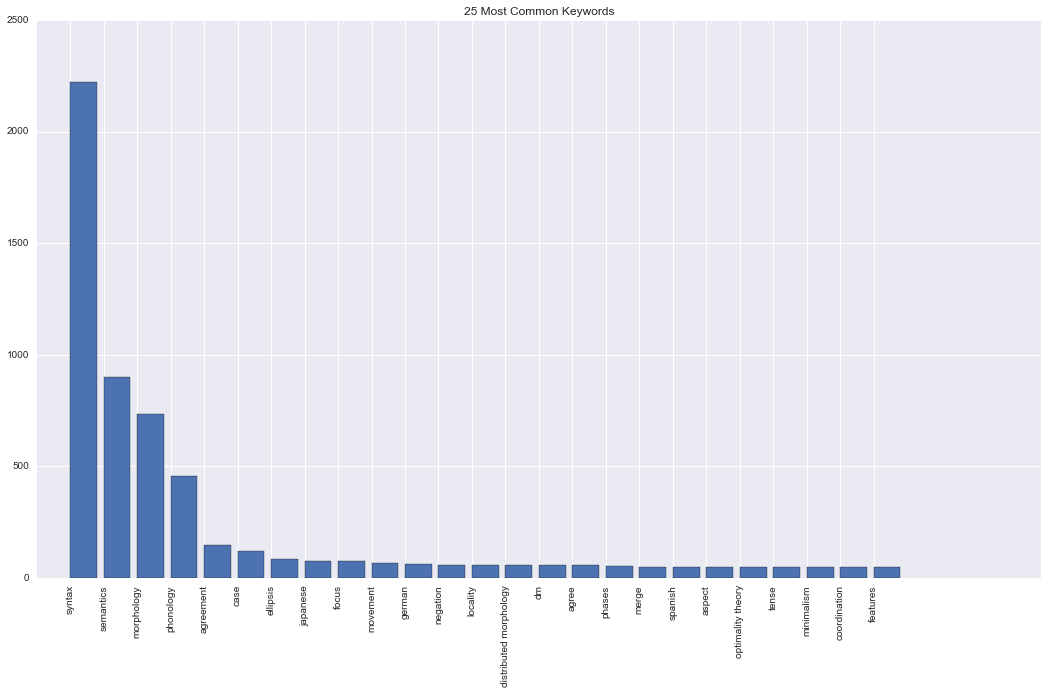

In [33]:
plt.bar(np.arange(1, 26, 1), [x[1] for x in count_kwd.most_common(25)])
plt.title('25 Most Common Keywords')
plt.xticks(np.arange(1, 26, 1), [x[0] for x in count_kwd.most_common(25)], rotation = 90);